In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
from base_regressor import BaseRegressor

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.preprocessing import StandardScaler


# Definir el wrapper para MLPRegressor
class MLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self,
                 layer1=None,
                 layer2=None,
                 num_hl=None,
                 batch_size=None,
                 activation=None,
                 solver=None,
                 learning_rate=None,
                 learning_rate_init=None,
                 alpha=None):
        self.layer1 = layer1
        self.layer2 = layer2
        self.num_hl = num_hl
        self.batch_size = batch_size
        self.activation = activation
        self.solver = solver
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.alpha = alpha

    def fit(self, x_train, y_train):
        model_mlp = MLPRegressor(
            hidden_layer_sizes=[self.layer1, self.layer2][-1*self.num_hl:],
            max_iter=300,
            activation=self.activation,
            batch_size=self.batch_size,
            solver=self.solver,
            learning_rate=self.learning_rate,
            learning_rate_init=self.learning_rate_init,
            alpha=self.alpha
        )
        model_mlp.fit(x_train, y_train)
        self.model = model_mlp
        return self

    def predict(self, x_train):
        return self.model.predict(x_train)

    def score(self, x_train, y_train):
        return self.model.score(x_train, y_train)
    


class MLPRegressorCustom(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = MLPWrapper
        if params is None:
            self.params = {
                'layer1': 100,
                'layer2': 50,
                'num_hl': 1,
                'batch_size': 32,
                'activation': 'tanh',
                'solver': 'adam',
                'alpha': 0.0001,
                'learning_rate': 'adaptive',
                'learning_rate_init': 0.001,
                'max_iter': 200
            }
        if params_space is None:
            self.params_space = {
                'layer1': Integer(1000, 2000),
                'layer2': Integer(300, 1000),
                'num_hl': Integer(1, 2),
                'batch_size': Categorical([8, 32, 128, 256, 512]),
                'activation': Categorical(['relu', 'tanh', 'logistic']),
                'solver': Categorical(['adam', 'lbfgs', 'sgd']),
                'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
                'learning_rate': Categorical(['constant', 'adaptive', 'invscaling']),
                'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform')
            }

        self.scaler=StandardScaler()


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import pickle
#from mlp_regressor_custom import MLPRegressorCustom  # Asegúrate de importar correctamente tu clase personalizada

#save_path=f'{path}MLP/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

# Leer el dataframe desde el archivo Excel
df = pd.read_excel(file_path)

# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)

# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

# Crear una instancia del modelo MLPRegressorCustom
mlp_model = MLPRegressorCustom()

# Establecer los datos en el modelo (preprocesamiento y división en entrenamiento y prueba)
mlp_model.set_data(X, y)

In [7]:
mlp_model.X_test

,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,Alpha2_canon_RPD_CING_left,Alpha2_canon_RPD_CING_right,...,IAF_MFG_left,IAF_MFG_right,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right
986,0.273696,-0.182595,-1.085129,-1.044572,-0.272264,-0.464957,0.273696,-0.182595,-1.072232,-1.043807,...,-0.910680,-0.874157,-1.039601,-0.603336,-0.199929,0.628585,-1.081845,-0.300901,-0.840835,-0.136245
1363,0.345507,0.715623,-0.113246,0.474541,0.586371,0.583762,0.345507,0.715623,0.260680,0.388133,...,-0.910680,-0.874157,-0.975476,-1.055733,-1.071371,-1.059903,-1.081845,-1.098476,-1.184941,-1.359590
616,-0.549297,-0.704855,-0.891528,-0.971245,-0.735004,-0.819686,-0.549297,-0.704855,-1.051052,-1.082345,...,2.059546,0.463056,1.397157,2.240300,1.542953,-0.215659,1.312049,-1.098476,-0.840835,-0.878990
931,-0.831038,1.497887,-0.773301,-0.460169,-0.557503,-0.765315,-0.831038,1.497887,-0.940107,0.004590,...,2.744983,2.691744,3.064412,3.015837,2.414394,2.106012,2.110014,2.091825,-0.668782,-0.747917
60,-1.605460,-1.857803,-1.869605,-1.902070,-1.658037,-1.863670,-1.605460,-1.857803,-2.039889,-2.038112,...,-0.453722,-0.428420,-0.526600,-0.538708,-0.635650,-0.637781,-0.682862,-0.699688,-0.840835,-0.835299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2.058240,2.332141,0.742819,0.886768,0.704666,1.396328,2.058240,2.332141,1.377675,1.608344,...,2.516504,2.468875,2.872036,1.852531,1.107232,0.558231,0.613830,0.396978,-0.926862,-0.223626
726,-0.118778,0.331169,-0.105239,-0.045648,-0.085594,-0.169189,-0.118778,0.331169,0.065249,0.083306,...,-0.225243,0.463056,0.435278,0.366085,-0.780890,-0.004598,-0.383626,-0.201204,-1.356994,-1.097444
599,-0.335972,0.052384,-0.590696,-0.995944,-0.610650,-0.313050,-0.335972,0.052384,-0.316846,-0.160571,...,-0.567962,-0.874157,-0.718975,-0.797221,0.889372,2.106012,-1.081845,2.091825,1.524892,1.305555
553,-0.826596,-0.961609,-0.637371,-0.260053,-0.814231,-0.985561,-0.826596,-0.961609,-0.409300,-0.270347,...,-0.567962,-0.874157,-1.039601,-0.021683,2.414394,1.613536,2.110014,0.496674,2.772276,0.693883


In [ ]:
opt_mlp, best_params_mlp = mlp_model.SearchBestModel(n_iter_=10, early_stop=True, save_result=False)


In [ ]:
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/MLP/Modelos/opt_MLP_model_400iter.pickle', 'wb') as file:
        pickle.dump(opt_mlp, file)

In [5]:
with open(f'{path}Opt_Model/opt_MLP_model_400iter.pickle', 'rb') as file:
    opt_mlp= pickle.load(file)

In [9]:
resultados = opt_mlp.cv_results_
mlp_model.guardar_resultados_busqueda(resultados=resultados)

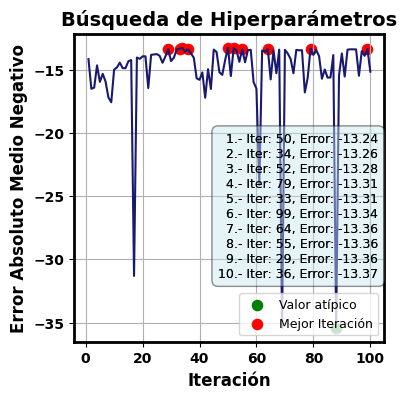

Top 1: Iteración 50, Error -13.241145787428769
Top 2: Iteración 34, Error -13.260045218111904
Top 3: Iteración 52, Error -13.282042412880466
Top 4: Iteración 79, Error -13.308556311665802
Top 5: Iteración 33, Error -13.314481749694753
Top 6: Iteración 99, Error -13.339647851406024
Top 7: Iteración 64, Error -13.359984027047469
Top 8: Iteración 55, Error -13.362700257995499
Top 9: Iteración 29, Error -13.364866967816303
Top 10: Iteración 36, Error -13.366401632528348


In [7]:
mlp_model.plot_search_best_model(opt_mlp, linewidth=1.5, color='midnightblue', num_max=100)

In [8]:
best_params_mlp = mlp_model.best_hyper(opt_mlp, num_max=100)

In [9]:
best_params_mlp

[{'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 32,
  'layer1': 1027,
  'layer2': 300,
  'learning_rate': 'constant',
  'learning_rate_init': 0.00015603214769031388,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 4.7723678262435505e-05,
  'batch_size': 128,
  'layer1': 1991,
  'layer2': 862,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0006429052672680192,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 3.249643885566297e-05,
  'batch_size': 128,
  'layer1': 1764,
  'layer2': 300,
  'learning_rate': 'constant',
  'learning_rate_init': 0.0006364203255725388,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 0.00042346708788470317,
  'batch_size': 32,
  'layer1': 1000,
  'layer2': 300,
  'learning_rate': 'constant',
  'learning_rate_init': 0.00015561629867166566,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 1.2350381741445199e-05,
  'batch_size': 128,
  'lay

# Trainer

In [ ]:
results, best_model_results , best_model= mlp_model.trainer(params_=best_params_mlp[0])

In [11]:
with open(f'{path}Opt_Model/BestModel_MLP_all_features.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}/Opt_Model/results_MLP_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)

In [5]:
with open(f'{path}Opt_Model/results_MLP_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

with open(f'{path}Opt_Model/BestModel_MLP_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)

In [43]:
mlp_model.guardar_resultados_trainer(resultados=results)

In [6]:
mlp_model.model=model

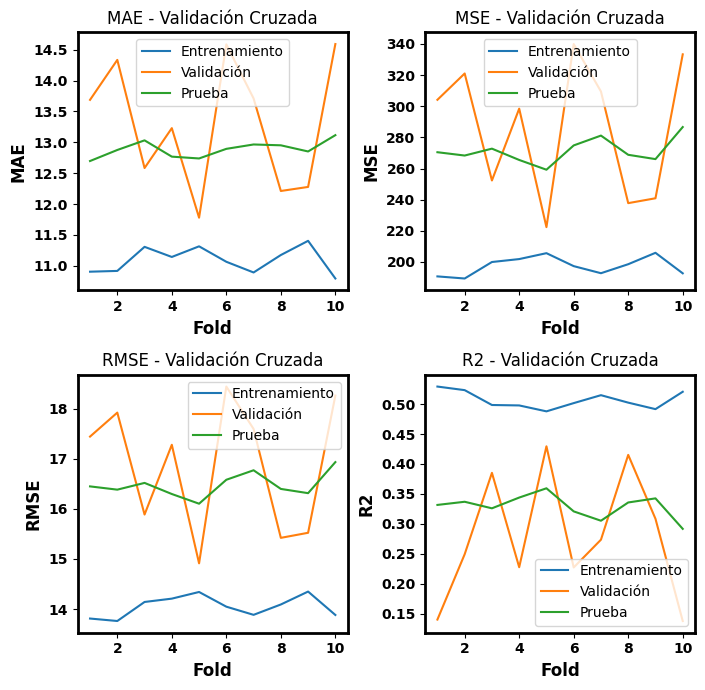

In [8]:
mlp_model.plot_metricas_evaluacion(results)

In [9]:
y_pred = mlp_model.predicter(mlp_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     162.9
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.37e-29
Time:                        22:52:44   Log-Likelihood:                -1056.1
No. Observations:                 276   AIC:                             2116.
Df Residuals:                     274   BIC:                             2123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7417      1.716     16.753      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


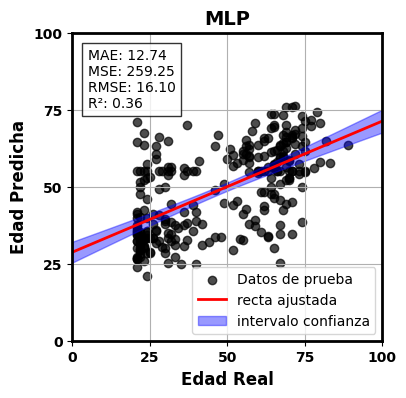

Error medio absoluto: 12.73887927882032
Error cuadrático medio: 259.24740849577245
Raíz del error cuadrático medio: 16.10116171261479
Coeficiente de determinación (R²): 0.35941997803275405


In [10]:
mlp_model.plot_regresion(y=y_pred,x= mlp_model.y_test,label_='Datos de prueba', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='MLP',line_ideal=False,confidence_interval=True, color= 'black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

Predicción en los datos de Entrenamiento

In [11]:
y_pred_train=mlp_model.predicter(mlp_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1033.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          2.23e-160
Time:                        22:52:49   Log-Likelihood:                -4058.1
No. Observations:                1101   AIC:                             8120.
Df Residuals:                    1099   BIC:                             8130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3035      0.779     35.032      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


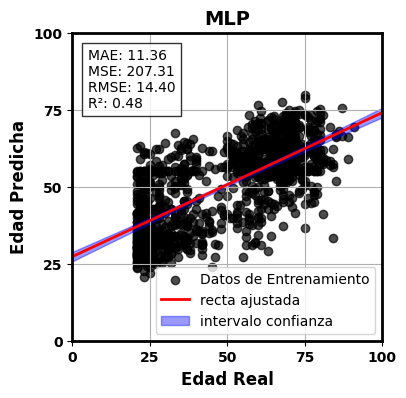

Error medio absoluto: 11.361696434213634
Error cuadrático medio: 207.3141463247911
Raíz del error cuadrático medio: 14.398407770472092
Coeficiente de determinación (R²): 0.48225657624071927


In [12]:
mlp_model.plot_regresion(y=y_pred_train,x= mlp_model.y_train, label_='Datos de Entrenamiento', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='MLP',line_ideal=False,confidence_interval=True, color= 'black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [13]:
residuals = mlp_model.predicter(mlp_model.X_train)-mlp_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1339.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          2.10e-192
Time:                        22:52:52   Log-Likelihood:                -4058.1
No. Observations:                1101   AIC:                             8120.
Df Residuals:                    1099   BIC:                             8130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3035      0.779     35.032      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


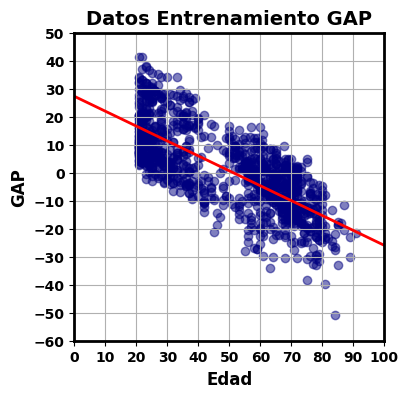

Error medio absoluto: 49.58051284473904
Error cuadrático medio: 3420.5742170073822
Raíz del error cuadrático medio: 58.48567531462197
Coeficiente de determinación (R²): -7.542493784102879


In [14]:
mlp_model.plot_regresion(x=mlp_model.y_train,y=residuals,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='Datos Entrenamiento GAP', xlabel='Edad', ylabel='GAP')

In [15]:
y_pred_corrected=mlp_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     825.1
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.24e-84
Time:                        22:52:55   Log-Likelihood:                -1056.1
No. Observations:                 276   AIC:                             2116.
Df Residuals:                     274   BIC:                             2123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4382      1.716      0.838      0.4

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


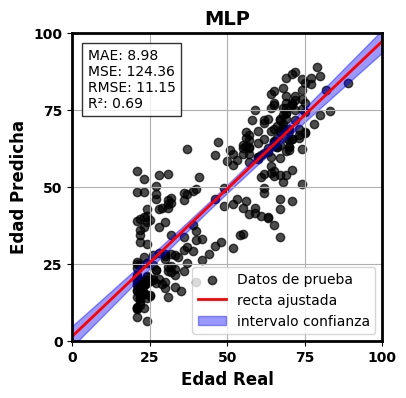

Error medio absoluto: 8.97811051265687
Error cuadrático medio: 124.35809957202173
Raíz del error cuadrático medio: 11.151596279099317
Coeficiente de determinación (R²): 0.6927208853586295


In [16]:
mlp_model.plot_regresion(y=y_pred_corrected,x= mlp_model.y_test,label_='Datos de prueba', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='MLP',line_ideal=False,confidence_interval=True, color= 'black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

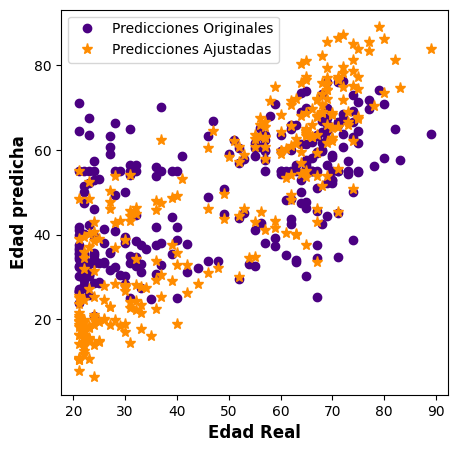

In [17]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(mlp_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(mlp_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [18]:
#with open(f'{path}Brain_Age/Age_Array/mlp_edad_predicha_array.pickle', 'wb') as file:
#        pickle.dump(y_pred_corrected, file)

In [22]:
shap_values, shap_summary_sorted = mlp_model.feature_importance_shap(X_test = mlp_model.X_test, model = mlp_model.model)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPWrapper(activation='logistic', alpha=1e-05, batch_size=32, layer1=1027,
           layer2=300, learning_rate='constant',
           learning_rate_init=0.00015603214769031388, num_hl=2, solver='sgd')


  0%|          | 0/276 [00:00<?, ?it/s]c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
  0%|          | 1/276 [00:01<05:29,  1.20s/it]c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
  1%|          | 2/276 [00:02<05:02,  1.10s/it]c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\sklearn

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 1514.339093215998
Low_subj_spec_EPP_CING_left: 1163.297659433574
Low_subj_spec_EPP_HPC_right: 942.8473680726813
Low_subj_spec_RPD_CING_right: 862.2994218634557
TF_MFG_right: 835.0881583465323
Low_subj_spec_RPD_OCC_right: 826.2224838967812
TF_HPC_right: 779.5731244325339
Low_subj_spec_RPD_PARIET_right: 710.8328462290465
IAF_OCC_left: 667.8419828639563
Alpha2_canon_EPP_OCC_right: 664.2180118215347
Alpha2_canon_RPD_HPC_left: 661.971680255359
Alpha2_canon_EPP_HPC_left: 652.0192367230318
High_subj_spec_RPD_CING_right: 644.1956137128658
Alpha2_canon_RPD_OCC_right: 643.9090664977251
High_subj_spec_EPP_CING_right: 641.6956981592401
Low_subj_spec_EPP_PARIET_left: 611.5176170387258
IAF_OCC_right: 595.0616337631152
Low_subj_spec_RPD_CING_left: 588.7248653711783
Low_subj_spec_EPP_OCC_right: 579.8568727112637
Low_subj_spec_EPP_HPC_left: 570.2331817014446
TF_SFG_right: 526.9253679621029
Alpha2_canon_RPD_OCC_le

In [15]:
shap_summary_sorted

[('Low_subj_spec_RPD_OCC_left', 1605.8982928569785),
 ('Low_subj_spec_EPP_CING_left', 1195.1860464399226),
 ('Low_subj_spec_EPP_HPC_right', 973.4907240609671),
 ('Low_subj_spec_RPD_OCC_right', 944.579494430714),
 ('Low_subj_spec_RPD_CING_right', 907.3511555571645),
 ('TF_HPC_right', 844.2731531362831),
 ('TF_MFG_right', 843.9047419890629),
 ('Low_subj_spec_RPD_PARIET_right', 826.4896504996124),
 ('Alpha2_canon_EPP_HPC_left', 723.9502945747117),
 ('Alpha2_canon_RPD_HPC_left', 720.5922570537972),
 ('Alpha2_canon_EPP_OCC_right', 715.7290456219301),
 ('IAF_OCC_left', 715.2464724041278),
 ('Alpha2_canon_RPD_OCC_right', 699.9887476123068),
 ('High_subj_spec_RPD_CING_right', 675.808860621004),
 ('High_subj_spec_EPP_CING_right', 667.8357170024804),
 ('Low_subj_spec_EPP_HPC_left', 654.2220444667522),
 ('Low_subj_spec_RPD_CING_left', 633.8338292707188),
 ('Low_subj_spec_EPP_PARIET_left', 628.1361946670511),
 ('IAF_OCC_right', 597.7838677168065),
 ('TF_SFG_right', 555.9332571445179),
 ('Low_subj_

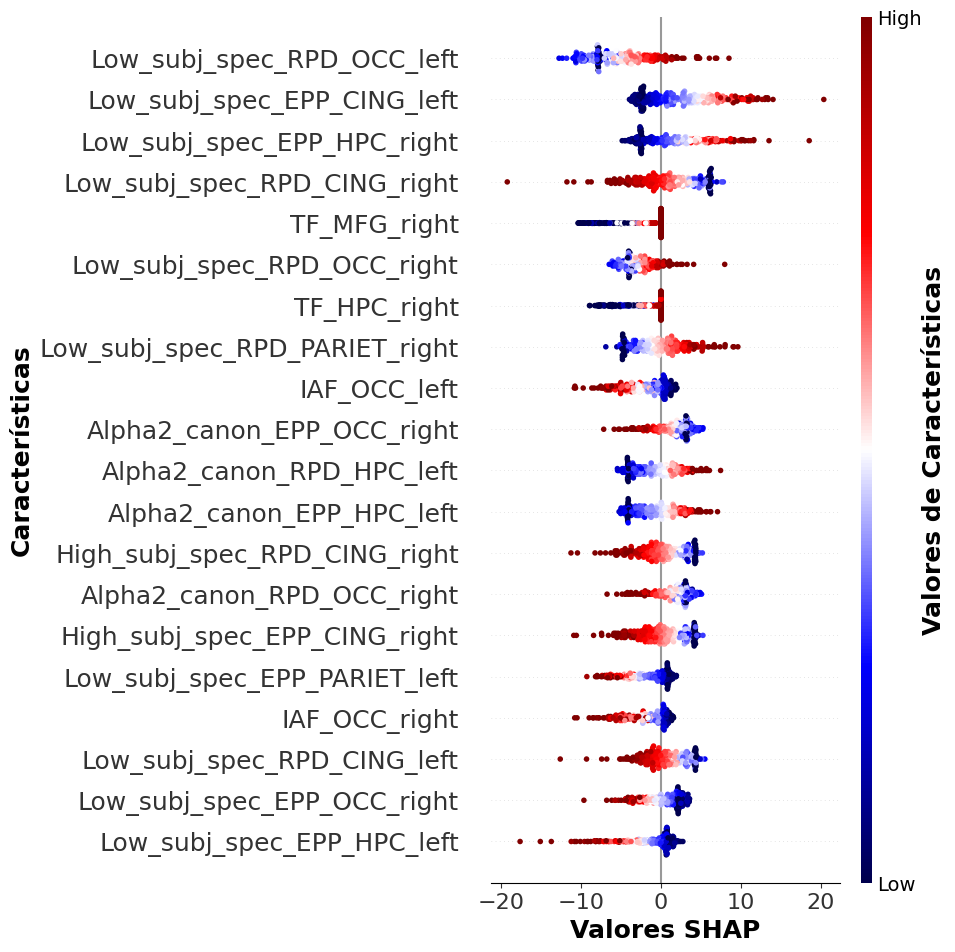

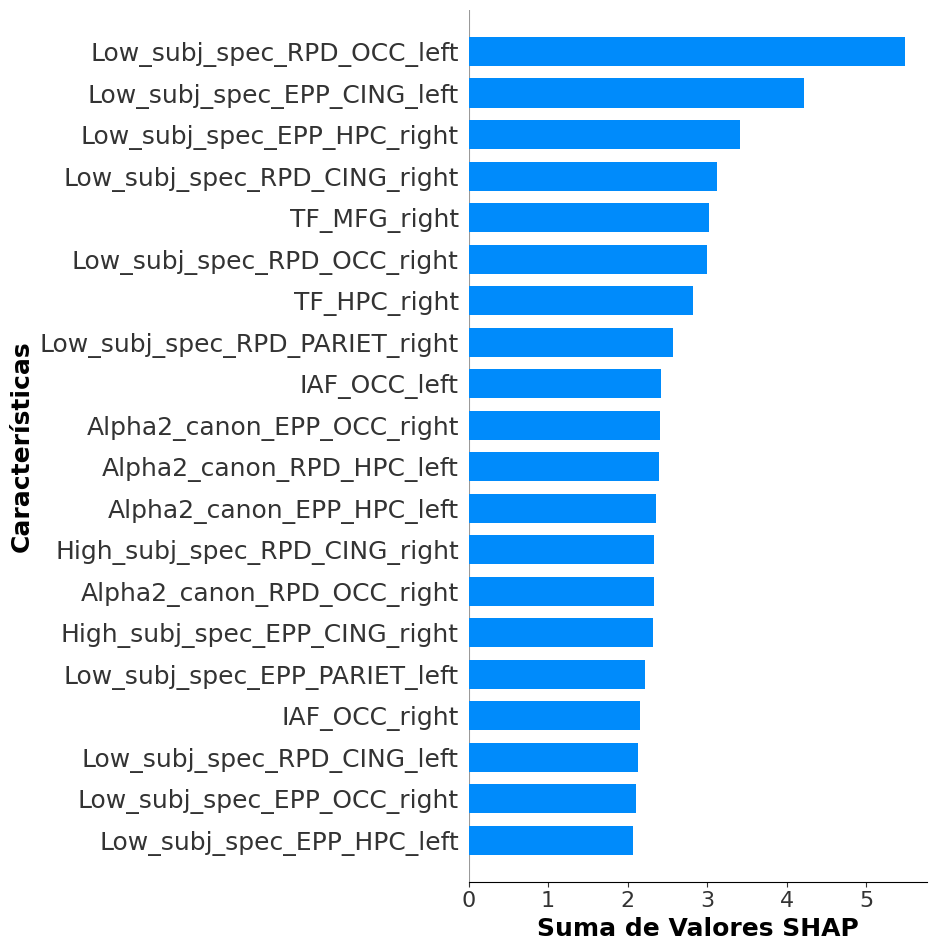

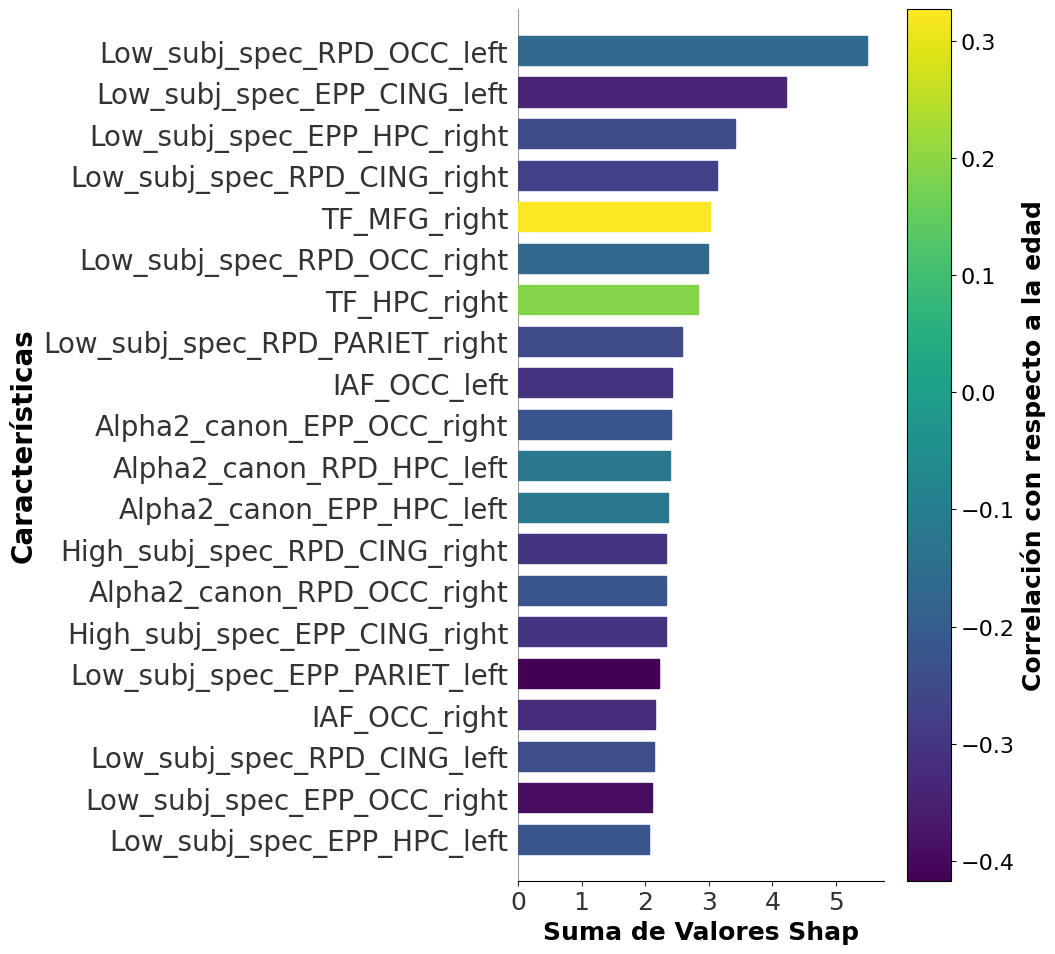

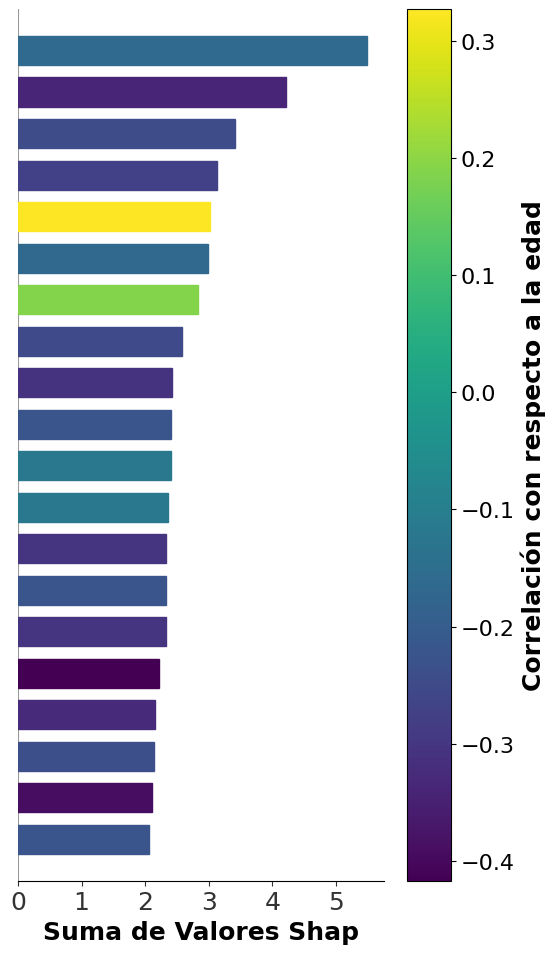

In [23]:
mlp_model.plot_feature_importance(shap_values=shap_values,X_test=mlp_model.X_test,y_test=mlp_model.y_test)

In [24]:
with open(f'{path}Opt_Model/shap_summary_sorted_mlp.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)
with open(f'{path}Opt_Model/shap_values_mlp.pickle', 'wb') as file:
        pickle.dump(shap_values, file)

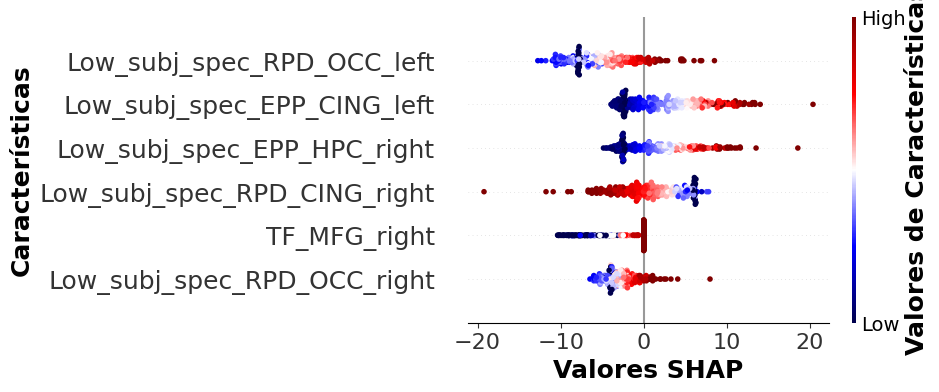

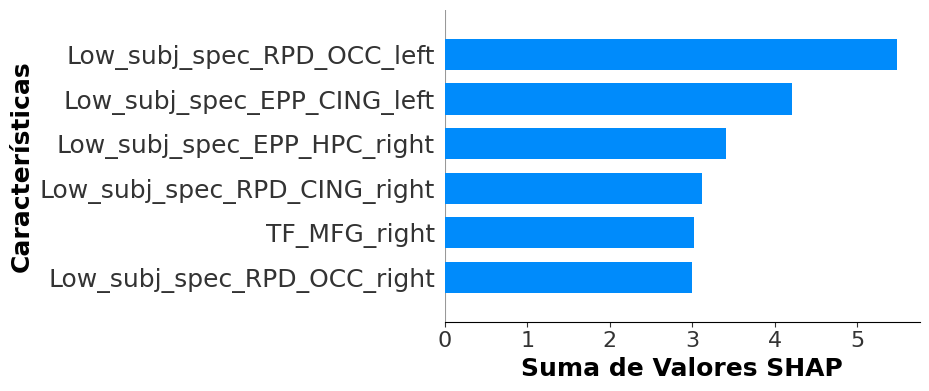

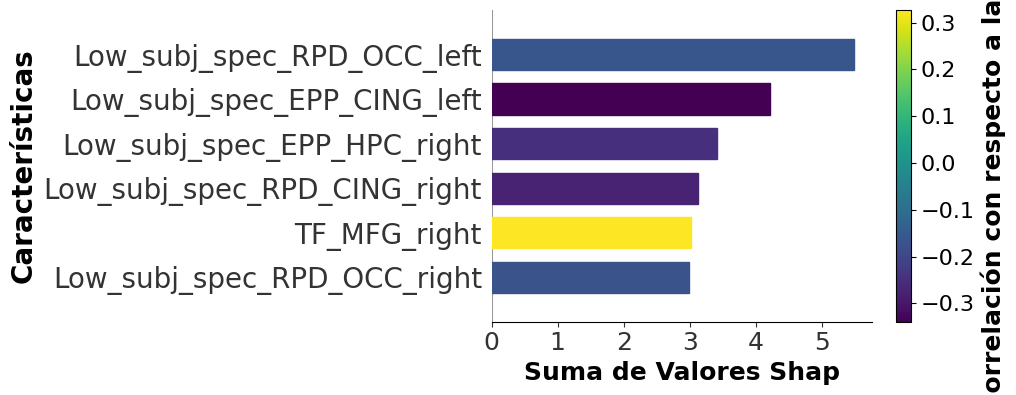

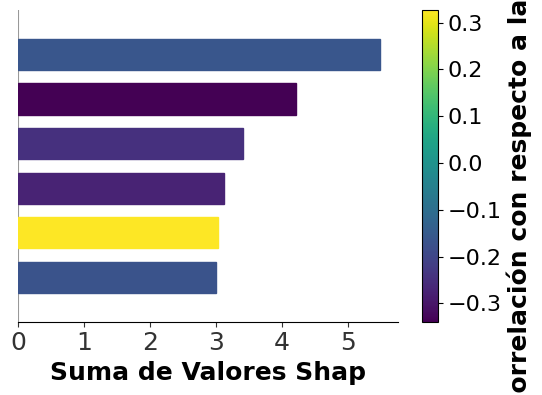

In [25]:
mlp_model.plot_feature_importance(shap_values=shap_values,X_test=mlp_model.X_test,y_test=mlp_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_mlp.pickle', 'rb') as file:
    shap_summary_sorted_mlp = pickle.load(file)



In [26]:
shap_por_region_sorted, resultado_normalizado_sorted=mlp_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

OCC_right: 1.000000
OCC_left: 0.659415
CING_right: 0.649144
HPC_left: 0.569378
CING_left: 0.529429
HPC_right: 0.520484
MFG_right: 0.252348
PARIET_right: 0.214801
PARIET_left: 0.184789


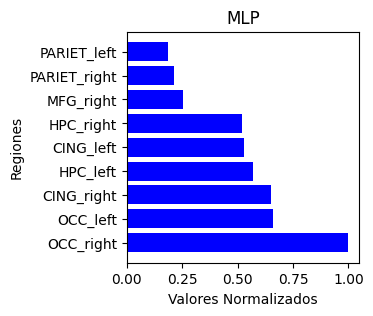

In [27]:
mlp_model.plot_normalized_values(resultado_normalizado_sorted, color='blue', name_set='MLP',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


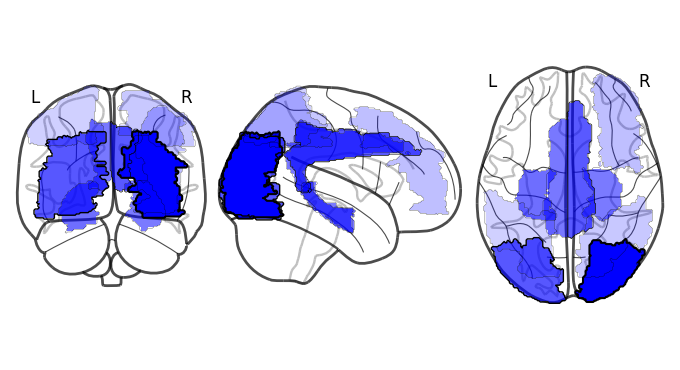

In [28]:
base_path = f'{path}cerebritos/'

mlp_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='blue')